In [3]:
import pandas as pd

df = pd.read_csv('F:\desktop\الكلية\Summer 3\data Analysis Training\\MY PROJECTS\\real estate data\\melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## **Preprocessing**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [7]:
df['Car'] = df['Car'].fillna(0)
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())
df['CouncilArea'] = df['CouncilArea'].fillna(df['CouncilArea'].mode()[0])
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [8]:
df['Car'] = df['Car'].astype('int')
df['Bedroom2'] = df['Bedroom2'].astype('int')
df['Bathroom'] = df['Bathroom'].astype('int')
df['Postcode'] = df['Postcode'].astype('int')
df['YearBuilt'] = df['YearBuilt'].astype('int')
df['Propertycount'] = df['Propertycount'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int32  
 10  Bedroom2       13580 non-null  int32  
 11  Bathroom       13580 non-null  int32  
 12  Car            13580 non-null  int32  
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  int32  
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

In [10]:
#see if there any land size less than or equal 0
count=0
for i in range(len(df['Landsize'])):
  if df['Landsize'][i] <= 0:
    count = count + 1
print(count)

1939


In [11]:
#see how many land size equal to 0 only
count=0
for i in range(len(df['Landsize'])):
  if df['Landsize'][i] == 0:
    count = count + 1
print(count)

1939


In [12]:
# How many land size equal to 0 and building size more than 0
count=0
for i in range(len(df['Landsize'])):
  if df['Landsize'][i] == 0 and df['BuildingArea'][i] > 0:
    count = count + 1
print(count)

1939


In [13]:
for i in range(len(df['Landsize'])):
  if df['Landsize'][i] == 0 and df['BuildingArea'][i] > 0:
    df['Landsize'][i] = df['BuildingArea'][i]
print("There are no more 0 in landsize")

There are no more 0 in landsize


C:\Users\M4tech\AppData\Local\Temp\ipykernel_11648\2848735410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Landsize'][i] = df['BuildingArea'][i]
C:\Users\M4tech\AppData\Local\Temp\ipykernel_11648\2848735410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Landsize'][i] = df['BuildingArea'][i]
C:\Users\M4tech\AppData\Local\Temp\ipykernel_11648\2848735410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Landsize'

In [14]:
count=0
for i in range(len(df['Landsize'])):
  if df['Landsize'][i] <= 0:
    count = count + 1
print(count)

0


In [15]:
numeric_df = df.select_dtypes(include=['number'])

#negative values in each column
for col in numeric_df.columns:
    print(f"Negative values in {col}:")
    print(numeric_df[numeric_df[col] < 0][col])
    print()

Negative values in Rooms:
Series([], Name: Rooms, dtype: int64)

Negative values in Price:
Series([], Name: Price, dtype: float64)

Negative values in Distance:
Series([], Name: Distance, dtype: float64)

Negative values in Postcode:
Series([], Name: Postcode, dtype: int32)

Negative values in Bedroom2:
Series([], Name: Bedroom2, dtype: int32)

Negative values in Bathroom:
Series([], Name: Bathroom, dtype: int32)

Negative values in Car:
Series([], Name: Car, dtype: int32)

Negative values in Landsize:
Series([], Name: Landsize, dtype: float64)

Negative values in BuildingArea:
Series([], Name: BuildingArea, dtype: float64)

Negative values in YearBuilt:
Series([], Name: YearBuilt, dtype: int32)

Negative values in Lattitude:
0       -37.79960
1       -37.80790
2       -37.80930
3       -37.79690
4       -37.80720
           ...   
13575   -37.90562
13576   -37.85927
13577   -37.85274
13578   -37.85908
13579   -37.81188
Name: Lattitude, Length: 13580, dtype: float64

Negative values in

In [16]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [17]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderUnavailable
import time

# Initialize the geocoder
geolocator = Nominatim(user_agent="my-geocoding-app")

# Create an empty DataFrame with columns
df_location = pd.DataFrame(columns=['Street name', 'Building number'])

# Function to perform reverse geocoding with retry logic
def get_location_with_retry(lat, lon, retries=3, delay=5):
    for attempt in range(retries):
        try:
            return geolocator.reverse((lat, lon), exactly_one=True)
        except GeocoderUnavailable:
            print(f"Attempt {attempt + 1} failed. Retrying in {delay} seconds...")
            time.sleep(delay)
    print("Max retries exceeded. Could not get location.")
    return None

# Loop through the DataFrame
for i in range(len(df)):
    # Perform reverse geocoding with retries
    location = get_location_with_retry(df['Lattitude'][i], df['Longtitude'][i])

    if location:
        # Extract address data
        address = location.raw.get('address', {})
        street_name = address.get('road', 'Street name not found')
        building_number = address.get('house_number', 'Building number not found')

        # Store the results in the DataFrame
        df_location.loc[i, 'Street name'] = street_name
        df_location.loc[i, 'Building number'] = building_number
    else:
        # Handle the case where location could not be found
        df_location.loc[i, 'Street name'] = 'Location not found'
        df_location.loc[i, 'Building number'] = 'Location not found'

df_location.head()

Attempt 1 failed. Retrying in 5 seconds...
Attempt 2 failed. Retrying in 5 seconds...


,Street name,Building number
0,Turner Street,111
1,Bloomburg Street,Building number not found
2,Charles Street,5
3,Federation Lane,Building number not found
4,Park Street,Building number not found


In [18]:
count = 0
for street_name in df_location['Street name']:
    if street_name == 'Street name not found':
        count = count + 1
print(f"Street name not found count:{count}")

count = 0
for street_name in df_location['Street name']:
    if street_name == 'Location not found':
        count = count + 1
print(f"location not found count:{count}")

Street name not found count:30
location not found count:0


In [19]:
count = 0
for building_number in df_location['Building number']:
    if building_number == 'Building number not found':
        count = count + 1
print(f"Building number not found count:{count}")

count = 0
for building_number in df_location['Building number']:
    if building_number == 'Location not found':
        count = count + 1
print(f"Location not found count:{count}")

Building number not found count:9005
Location not found count:0


In [20]:
import re
df_address = pd.DataFrame()
def split_address(address):
    match = re.match(r'([\d/]+)\s+(.+)', address)
    if match:
        building_number = match.group(1)
        street_name = match.group(2)
        return pd.Series([building_number, street_name])
    return pd.Series([None, None])  # In case of no match

# Apply the function to the 'address' column and create two new columns
df_address[['Building Number', 'Street Name']] = df['Address'].apply(split_address)
df_address.head()

,Building Number,Street Name
0,85,Turner St
1,25,Bloomburg St
2,5,Charles St
3,40,Federation La
4,None,None


In [21]:
df_address.isnull().sum()

Building Number    499
Street Name        499
dtype: int64

In [22]:
df_location_copy = df_location.copy()
df_location_copy.head()

,Street name,Building number
0,Turner Street,111
1,Bloomburg Street,Building number not found
2,Charles Street,5
3,Federation Lane,Building number not found
4,Park Street,Building number not found


In [23]:
# Ensure index alignment between all DataFrames
df_address = df_address.reset_index(drop=True)
df_location = df_location.reset_index(drop=True)
df = df.reset_index(drop=True)

# Collect indices to be dropped
indices_to_drop = []

for i, row in df_address.iterrows():
    if i in df_location.index:
        if pd.isna(row['Building Number']) and (df_location.loc[i, 'Building number'] == 'Location not found' or df_location.loc[i, 'Building number'] == 'Building number not found'):
            indices_to_drop.append(i)
        
        if pd.isna(row['Street Name']) and (df_location.loc[i, 'Street name'] == 'Location not found' or df_location.loc[i, 'Street name'] == 'Street name not found'):
            indices_to_drop.append(i)

# Drop rows after loop to avoid mid-iteration index shifts
df = df.drop(indices_to_drop).reset_index(drop=True)
df_address = df_address.drop(indices_to_drop).reset_index(drop=True)
df_location = df_location.drop(indices_to_drop).reset_index(drop=True)


In [24]:
for i in df_address.index:
    # Handle Building Number
    if pd.isna(df_address.loc[i, 'Building Number']) and (df_location.loc[i, 'Building number'] != 'Location not found' and df_location.loc[i, 'Building number'] != 'Building number not found'):
        df_address.loc[i, 'Building Number'] = df_location.loc[i, 'Building number']
    
    # Handle Street Name
    if pd.isna(df_address.loc[i, 'Street Name']) and (df_location.loc[i, 'Street name'] != 'Location not found' and df_location.loc[i, 'Street name'] != 'Street name not found'):
        df_address.loc[i, 'Street Name'] = df_location.loc[i, 'Street name']


In [25]:
for i in df_address.index:
    # Handle 'Building number'
    if df_location.loc[i, 'Building number'] == 'Location not found' or df_location.loc[i, 'Building number'] == 'Building number not found':
        df_location.loc[i, 'Building number'] = df_address.loc[i, 'Building Number']
    
    # Handle 'Street name'
    if df_location.loc[i, 'Street name'] == 'Location not found' or df_location.loc[i, 'Street name'] == 'Street name not found':
        df_location.loc[i, 'Street name'] = df_address.loc[i, 'Street Name']


In [26]:
for i in df_address.index:
    # Check and update 'Building Number' if they are different
    if df_location.loc[i, 'Building number'] != df_address.loc[i, 'Building Number']:
        df_address.loc[i, 'Building Number'] = df_location.loc[i, 'Building number']
         
    # Check and update 'Street Name' if they are different
    if df_location.loc[i, 'Street name'] != df_address.loc[i, 'Street Name']:
        df_address.loc[i, 'Street Name'] = df_location.loc[i, 'Street name']


In [27]:
df_address.isnull().sum()

Building Number    0
Street Name        0
dtype: int64

In [28]:
df['Address'] = df_address['Building Number'].astype(str) + ' ' + df_address['Street Name'].astype(str)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,111 Turner Street,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,...,1,1,202.0,151.96765,1964,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg Street,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,...,1,0,156.0,79.00000,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles Street,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,...,2,0,134.0,150.00000,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation Lane,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067,...,2,1,94.0,151.96765,1964,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,131 Charles Street,2,h,941000.0,S,Jellis,2016-05-07,2.5,3067,...,1,0,181.0,151.96765,1964,Yarra,-37.8041,144.9953,Northern Metropolitan,4019


# **Export the df to csv file**

In [30]:
df.to_csv(r'C:\Users\M4tech\anaconda3\CODES\real estate data\Preprocessed_data.csv', index=False)

# **prepare to model**

In [32]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}

# Loop through each column in the DataFrame
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

print(df_encoded.head())

   Suburb  Address  Rooms  Type      Price  Method  SellerG  Date  Distance  \
0       0     1469      2     0  1480000.0       1       23    29       2.5   
1       0     5404      2     0  1035000.0       1       23     1       2.5   
2       0     9015      3     0  1465000.0       3       23    33       2.5   
3       0     8212      3     0   850000.0       0       23    33       2.5   
4       0     2182      2     0   941000.0       1      106     4       2.5   

   Postcode  ...  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0      3067  ...         1    1     202.0     151.96765       1964   
1      3067  ...         1    0     156.0      79.00000       1900   
2      3067  ...         2    0     134.0     150.00000       1900   
3      3067  ...         2    1      94.0     151.96765       1964   
4      3067  ...         1    0     181.0     151.96765       1964   

   CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
0           31   -37.7996    144.9984

In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13226 entries, 0 to 13225
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13226 non-null  int32  
 1   Address        13226 non-null  int32  
 2   Rooms          13226 non-null  int64  
 3   Type           13226 non-null  int32  
 4   Price          13226 non-null  float64
 5   Method         13226 non-null  int32  
 6   SellerG        13226 non-null  int32  
 7   Date           13226 non-null  int32  
 8   Distance       13226 non-null  float64
 9   Postcode       13226 non-null  int32  
 10  Bedroom2       13226 non-null  int32  
 11  Bathroom       13226 non-null  int32  
 12  Car            13226 non-null  int32  
 13  Landsize       13226 non-null  float64
 14  BuildingArea   13226 non-null  float64
 15  YearBuilt      13226 non-null  int32  
 16  CouncilArea    13226 non-null  int32  
 17  Lattitude      13226 non-null  float64
 18  Longti

In [34]:
df_encoded.to_csv(r'C:\Users\M4tech\anaconda3\CODES\real estate data\encoded_data.csv', index=False)

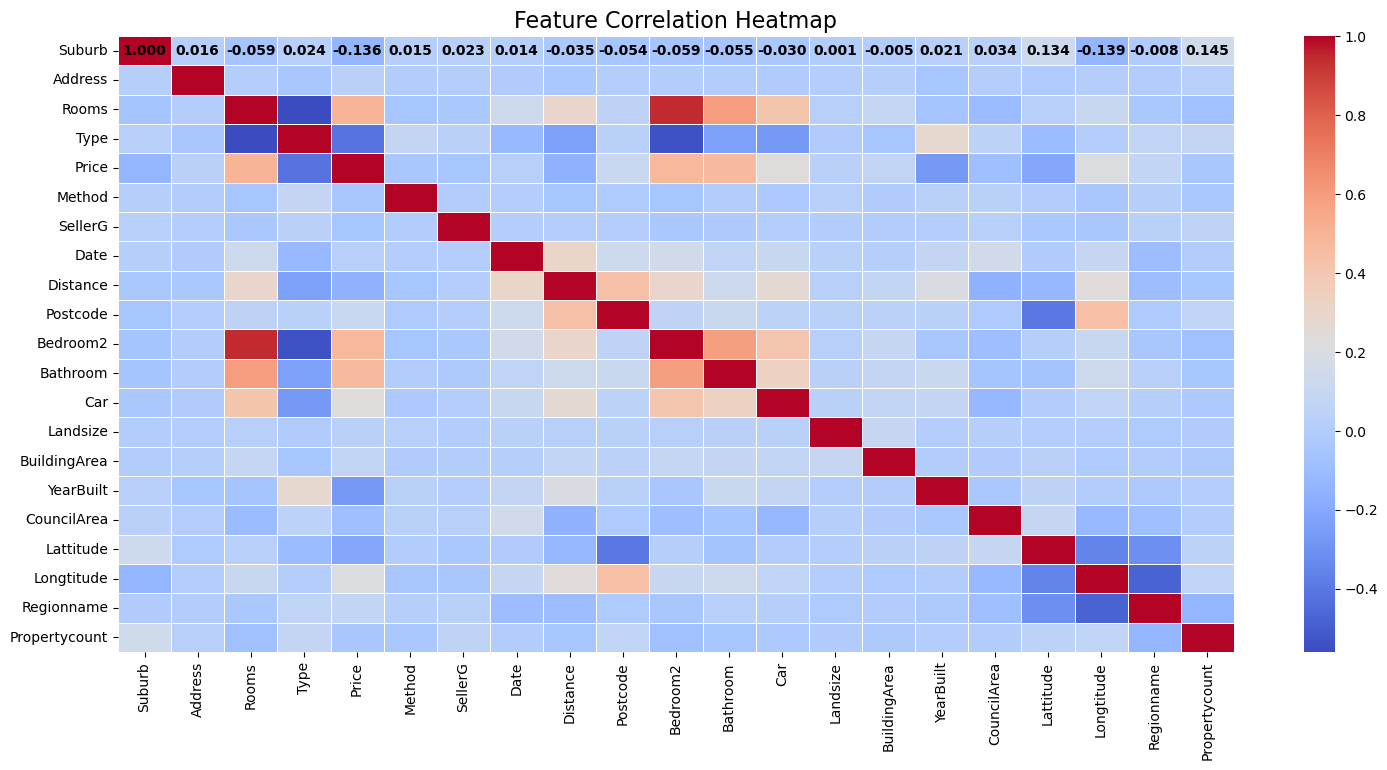

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df_encoded.corr()

# Plot the heatmap with explicit formatting and annotation settings
plt.figure(figsize=(18, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.3f', 
            annot_kws={"size": 10, "color": "black", "weight": "bold"})
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()


In [36]:
df_encoded.drop(columns = ['Propertycount','Regionname','CouncilArea','BuildingArea','Landsize','Postcode'
                           ,'Distance','Date','SellerG','Method','Address','Suburb'])

,Rooms,Type,Price,Bedroom2,Bathroom,Car,YearBuilt,Lattitude,Longtitude
0,2,0,1480000.0,2,1,1,1964,-37.79960,144.99840
1,2,0,1035000.0,2,1,0,1900,-37.80790,144.99340
2,3,0,1465000.0,3,2,0,1900,-37.80930,144.99440
3,3,0,850000.0,3,2,1,1964,-37.79690,144.99690
4,2,0,941000.0,2,1,0,1964,-37.80410,144.99530
...,...,...,...,...,...,...,...,...,...
13221,4,0,1245000.0,4,2,2,1981,-37.90562,145.16761
13222,3,0,1031000.0,3,2,2,1995,-37.85927,144.87904
13223,3,0,1170000.0,3,2,4,1997,-37.85274,144.88738
13224,4,0,2500000.0,4,1,5,1920,-37.85908,144.89299


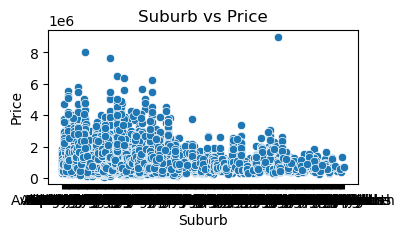

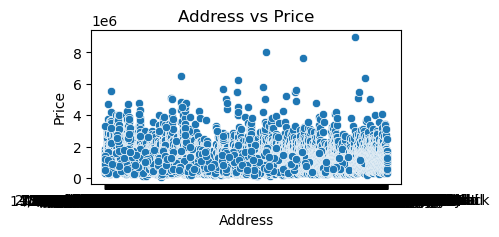

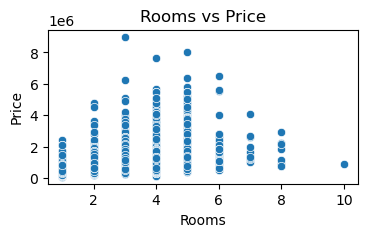

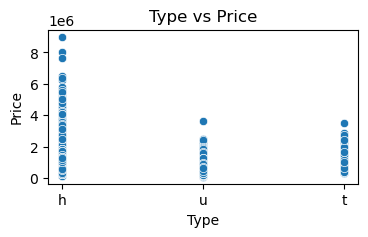

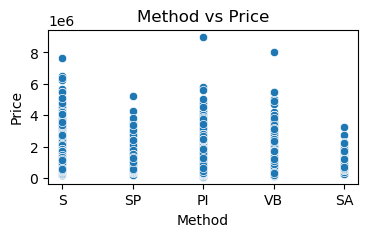

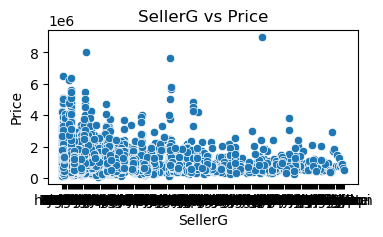

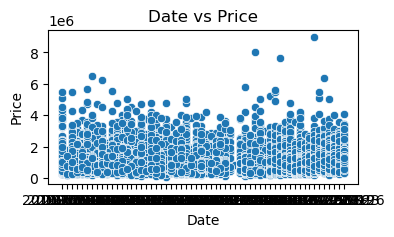

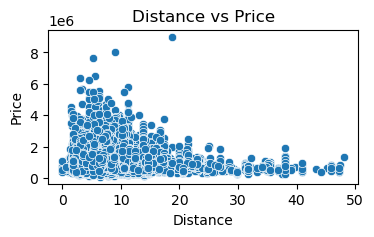

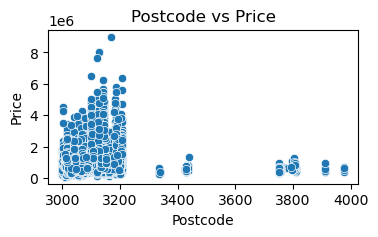

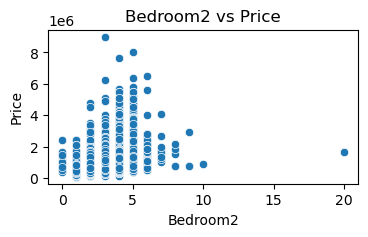

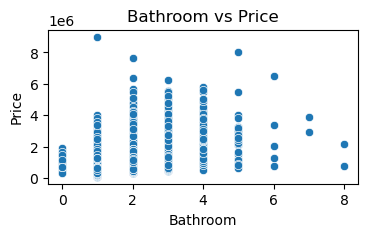

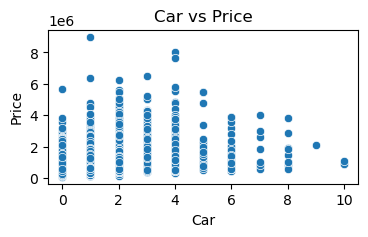

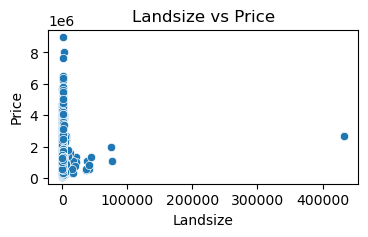

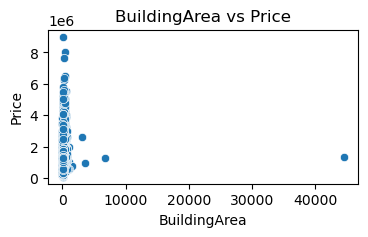

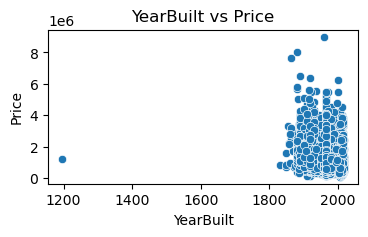

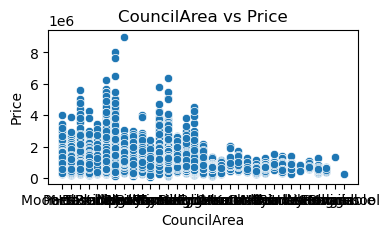

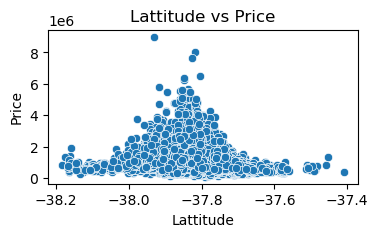

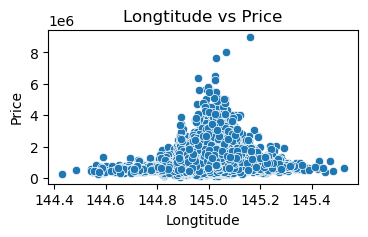

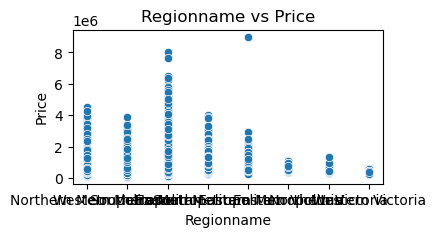

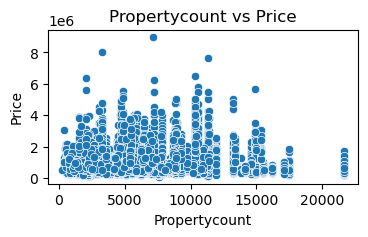

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of all columns except 'Price'
columns = df.columns.drop('Price')

# Loop through each column and create a scatter plot against 'Price'
for col in columns:
    plt.figure(figsize=(4,2))  # Create a new figure for each scatter plot
    sns.scatterplot(x=col, y='Price', data=df)
    plt.title(f'{col} vs Price')  # Set title for each scatter plot
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Price')  # Set y-axis label
    plt.show()  # Show each scatter plot individually


In [38]:
x=df_encoded.loc[:,df_encoded.columns!='Price']
y=df_encoded['Price']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Initialize variables to store the best model's results
best_degree = 0
best_mse_test = float('inf')  # Use a large initial value
best_model = None
best_r2_test = 0

# Define the range of degrees to try
degrees = [1, 2, 3]

# Loop over each degree
for degree in degrees:
    # Step 1: Transform the features in X_train and X_test to polynomial features of current degree
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Step 2: Fit the linear regression model on the transformed X_train_poly
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Step 3: Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Step 4: Evaluate the model
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Print the performance for the current degree
    print(f"Degree {degree} - Training Set Performance:")
    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2 Score):", r2_train)
    
    print(f"Degree {degree} - Testing Set Performance:")
    print("Mean Squared Error (MSE):", mse_test)
    print("R-squared (R2 Score):", r2_test)
    print("-" * 50)
    
    # Step 5: Keep track of the best degree (based on MSE on test data)
    if mse_test < best_mse_test:
        best_degree = degree
        best_mse_test = mse_test
        best_model = model
        best_r2_test = r2_test

# Print the best degree and its performance
print(f"Best Degree: {best_degree}")
print("Best Testing Set Performance:")
print("Mean Squared Error (MSE):", best_mse_test)
print("R-squared (R2 Score):", best_r2_test)

Degree 1 - Training Set Performance:
Mean Squared Error (MSE): 164322466287.49356
R-squared (R2 Score): 0.5986619406313249
Degree 1 - Testing Set Performance:
Mean Squared Error (MSE): 188909815096.48175
R-squared (R2 Score): 0.5566163325745419
--------------------------------------------------
Degree 2 - Training Set Performance:
Mean Squared Error (MSE): 104465606458.60649
R-squared (R2 Score): 0.7448551940942977
Degree 2 - Testing Set Performance:
Mean Squared Error (MSE): 238517926727.0308
R-squared (R2 Score): 0.4401828563278438
--------------------------------------------------
Degree 3 - Training Set Performance:
Mean Squared Error (MSE): 61050418201.40411
R-squared (R2 Score): 0.8508916223194346
Degree 3 - Testing Set Performance:
Mean Squared Error (MSE): 10585800983361.773
R-squared (R2 Score): -23.845565913247118
--------------------------------------------------
Best Degree: 1
Best Testing Set Performance:
Mean Squared Error (MSE): 188909815096.48175
R-squared (R2 Score): 0

C:\Users\M4tech\AppData\Local\Temp\ipykernel_11648\3862883582.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='red')  # Line representing perfect prediction


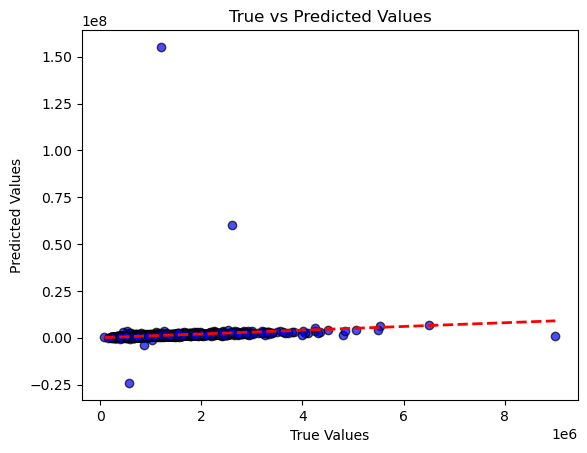

In [86]:
plt.scatter(y_test, y_test_pred,color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='red')  # Line representing perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()